**Analysed by** : *Md Nehal Salik*

# SQL Lab 

Due: Oct. 27, 2021

Many of the examples have been adapted from Data100 and J. Canny's course.

**Required Files**  
The imdb.db files (see instructions below on getting this data).

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pathlib import Path
from sqlalchemy import create_engine

we will be using SQLite to connect to databases. This is a simple, light-way module, there are of course other modules to interact with databases. 

SQLite has a [nice tutorial](https://www.sqlitetutorial.net/) if you want to learn more about database queries and explore additional options. 


In [ ]:
import sqlite3

A couple of things to know about SQLite.  Other database systems such as `MySQL` and `PostgreSQL` use *static typing*, where a column is declared for a specific data type and can only store data of that type. 

SQLite uses *dynamic type system*, where a value stored in a column determines its data type, not the column's data type.  

In [ ]:
# setup connection to new empty db
conn = sqlite3.connect("testdatabase.db")

### Printing out SQL calls and results 

We define a function `print_sql(s)` that given an sql query `s` returns the results of the executing. 

In [ ]:
def print_sql(s):
    print('>', s)
    for result in conn.execute(s):
        print(result)
    print ()

We can confirm that the database is empty.

In [ ]:
print_sql('SELECT sql FROM sqlite_master;')

> SELECT sql FROM sqlite_master;
('CREATE TABLE s(\n    m INTEGER PRIMARY KEY, \n    u TEXT\n)',)
('CREATE TABLE t(\n    n TEXT PRIMARY KEY, \n    v CHAR\n)',)
(None,)



We could also use `pandas` `read_sql` function to read in the results of the query to a dataframe to disply.  *Be careful with running this code as it will create the dataframe - for a query that returns many records this could be memory-intensive*

In [ ]:
def pretty_print_sql(s):
    print('>', s)
    df = pd.read_sql(s, conn)
    display(df)

In [ ]:
pretty_print_sql('SELECT sql FROM sqlite_master;')

> SELECT sql FROM sqlite_master;


,sql
0,"CREATE TABLE s(\n m INTEGER PRIMARY KEY, \n..."
1,"CREATE TABLE t(\n n TEXT PRIMARY KEY, \n ..."
2,None


## Example 1: SQL with a Test DB 

Here we will use SQLite connection to a test database.

First, we will create two sample tables to use in the examples.

Create the relational instances in the database.

<img src="https://pages.mtu.edu/~lebrown/un5550-f20/lab6/ex1-tables.png" width="350px">



In [ ]:
conn.executescript("""
DROP TABLE IF EXISTS s;
DROP TABLE IF EXISTS t;

CREATE TABLE s(
    m INTEGER PRIMARY KEY, 
    u TEXT
);

INSERT INTO s VALUES 
    (1, 'W'),
    (2, 'X'),
    (3, 'X'),
    (4, 'Y');

CREATE TABLE t(
    n TEXT PRIMARY KEY, 
    v CHAR
);

INSERT INTO t VALUES 
    ('A', 'X'),
    ('B', 'X'),
    ('C', 'Y'),
    ('D', 'Z');
""");

We can use this to look at the tables `s` and `t` in undefined order.

In [ ]:
print_sql('SELECT * FROM s;')
print_sql('SELECT * FROM t;')

> SELECT * FROM s;
(1, 'W')
(2, 'X')
(3, 'X')
(4, 'Y')

> SELECT * FROM t;
('A', 'X')
('B', 'X')
('C', 'Y')
('D', 'Z')



In [ ]:
pretty_print_sql('SELECT * FROM t;')

> SELECT * FROM t;


,n,v
0,A,X
1,B,X
2,C,Y
3,D,Z


### Cross Join 

Let's know look at performing some of the join operations discussed in class.

First, we will look at the cross join or cross product.

<img src="https://pages.mtu.edu/~lebrown/un5550-f20/lab6/cross-join.png" width="600px">

In [ ]:
print_sql('SELECT * FROM s, t;')

> SELECT * FROM s, t;
(1, 'W', 'A', 'X')
(1, 'W', 'B', 'X')
(1, 'W', 'C', 'Y')
(1, 'W', 'D', 'Z')
(2, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(2, 'X', 'C', 'Y')
(2, 'X', 'D', 'Z')
(3, 'X', 'A', 'X')
(3, 'X', 'B', 'X')
(3, 'X', 'C', 'Y')
(3, 'X', 'D', 'Z')
(4, 'Y', 'A', 'X')
(4, 'Y', 'B', 'X')
(4, 'Y', 'C', 'Y')
(4, 'Y', 'D', 'Z')



In [ ]:
# Another way to structure our query
print_sql("""
SELECT *
FROM s CROSS JOIN t;
""")

> 
SELECT *
FROM s CROSS JOIN t;

(1, 'W', 'A', 'X')
(1, 'W', 'B', 'X')
(1, 'W', 'C', 'Y')
(1, 'W', 'D', 'Z')
(2, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(2, 'X', 'C', 'Y')
(2, 'X', 'D', 'Z')
(3, 'X', 'A', 'X')
(3, 'X', 'B', 'X')
(3, 'X', 'C', 'Y')
(3, 'X', 'D', 'Z')
(4, 'Y', 'A', 'X')
(4, 'Y', 'B', 'X')
(4, 'Y', 'C', 'Y')
(4, 'Y', 'D', 'Z')



### Inner Join 

Next, look at performing an inner join. 

<img src="https://pages.mtu.edu/~lebrown/un5550-f20/lab6/inner-join.png" width="600px">

In [ ]:
# Here are three methods for performing and printing out the inner join
print_sql('SELECT * FROM s JOIN t ON s.u = t.v;')
print_sql('SELECT * FROM s, t WHERE s.u = t.v;')
pretty_print_sql('SELECT * FROM s, t WHERE s.u = t.v;')

> SELECT * FROM s JOIN t ON s.u = t.v;
(2, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(3, 'X', 'A', 'X')
(3, 'X', 'B', 'X')
(4, 'Y', 'C', 'Y')

> SELECT * FROM s, t WHERE s.u = t.v;
(2, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(3, 'X', 'A', 'X')
(3, 'X', 'B', 'X')
(4, 'Y', 'C', 'Y')

> SELECT * FROM s, t WHERE s.u = t.v;


,m,u,n,v
0,2,X,A,X
1,2,X,B,X
2,3,X,A,X
3,3,X,B,X
4,4,Y,C,Y


### Left Outer Join 

Next, let's examine performing a left outer join. 

<img src="https://pages.mtu.edu/~lebrown/un5550-f20/lab6/left-outer-join.png" width="600px">

In [ ]:
print_sql('SELECT * FROM s LEFT JOIN t ON s.u = t.v')

> SELECT * FROM s LEFT JOIN t ON s.u = t.v
(1, 'W', None, None)
(2, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(3, 'X', 'A', 'X')
(3, 'X', 'B', 'X')
(4, 'Y', 'C', 'Y')



### Other Joins 



In [ ]:
print_sql('SELECT s.m, s.u, t.n, t.v FROM t LEFT JOIN s ON s.u = t.v;')
print_sql('SELECT s.m, s.u, t.n, t.v FROM s LEFT JOIN t ON s.u = t.v UNION '
          'SELECT s.m, s.u, t.n, t.v FROM t LEFT JOIN s ON s.u = t.v;')

> SELECT s.m, s.u, t.n, t.v FROM t LEFT JOIN s ON s.u = t.v;
(2, 'X', 'A', 'X')
(3, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(3, 'X', 'B', 'X')
(4, 'Y', 'C', 'Y')
(None, None, 'D', 'Z')

> SELECT s.m, s.u, t.n, t.v FROM s LEFT JOIN t ON s.u = t.v UNION SELECT s.m, s.u, t.n, t.v FROM t LEFT JOIN s ON s.u = t.v;
(None, None, 'D', 'Z')
(1, 'W', None, None)
(2, 'X', 'A', 'X')
(2, 'X', 'B', 'X')
(3, 'X', 'A', 'X')
(3, 'X', 'B', 'X')
(4, 'Y', 'C', 'Y')



In [ ]:
# Close down connection to database
conn.close()

## Example 2: IMDB 

Let's look at some large data files!  We will pull some data from IMDB. 


### Database Created

Here is a summary on how the database was created. 

**Download data**

The data we are interested is available from [IMDB](https://www.imdb.com/interfaces/)

```python 
# From https://www.imdb.com/interfaces/
fetch_and_cache('https://datasets.imdbws.com/title.basics.tsv.gz', 'titles.tsv.gz') 
fetch_and_cache('https://datasets.imdbws.com/name.basics.tsv.gz', 'names.tsv.gz')
```

**Unzip files**

```python 
!gunzip -kf data/titles.tsv.gz
!gunzip -kf data/names.tsv.gz
!ls -lh data
```

**View files** 

If on a Mac, Linux computer or Colab notebook. 

```
!head -n5 data/titles.tsv 
!head -n5 data/names.tsv
```

**Create the Database**

I have done this for you because it is easier using the command line with `sqlite3`.  

* First, removed the `"` that appear in the tab files.  
* Create database using the following commands. 

On a Mac/Linux box with sqlite3 v3.8 or higher, run the following commands at the terminal. 

```
(base) lebrown@lebrown-macbook data$ sqlite3 imdb.db
SQLite version 3.27.2 2019-02-25 16:06:06
Enter ".help" for usage hints.
sqlite> .mode tabs
sqlite> .import titles.tsv titles
sqlite> .import names.tsv names
sqlite> ^D
```


### Download the Database 

The `imdb.db` database is available for you to download on [Kaggle](https://www.kaggle.com/). 

You have already created your Kaggle account and can again use your API to access the data.

#### Method 1: 
Copy and paste the key information (does not upload your key information to the Drive). 

In [ ]:
import os 
from getpass import getpass

os.environ['KAGGLE_USERNAME'] = getpass("Enter Kaggle Username: ")
os.environ['KAGGLE_KEY'] = getpass("Enter Kaggle API Key: ")

Enter Kaggle Username: ··········
Enter Kaggle API Key: ··········


#### Method 2 

Load `kaggle.json` to Colab directory (file is destroyed when sevice is disconnected).  This method relys on Google's security for safely storing and protecting your data. 

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import json
with open("kaggle.json") as f:
    keys = json.load(f)

os.environ['KAGGLE_USERNAME'] = keys["username"] # username from the json file
os.environ['KAGGLE_KEY'] = keys["key"] # key from the json file

#### Download the Data 

In [ ]:
!kaggle datasets download -d lebrown/un5550lab6 --force # api copied from kaggle

 98% 470M/479M [00:05<00:00, 134MB/s]
100% 479M/479M [00:05<00:00, 95.3MB/s]


In [ ]:
!unzip un5550lab6.zip

Archive:  un5550lab6.zip
replace imdb.db? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: imdb.db                 


You now have the `imdb.db` database available to you.

In [ ]:
conn = sqlite3.connect("imdb.db")

### 1 

Let's look at just the first 10 entries from the `titles` relation. 

Your solution should be of the form: 
```
pretty_print_sql(<query>) 
#or 
print_sql(<query>)
```

In [ ]:
### BEGIN SOLUTION 
pretty_print_sql('SELECT * FROM titles LIMIT 10;') 
### END SOLUTION 

> SELECT * FROM titles LIMIT 10;


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


### 2 

While we know the structure of the tables from IMDB, see how this info is laid out.

That is, show the tables in the database and their structure (i.e., what fields-types they have)

Use the `conn.execute(...)` function rather than the `print_sql(...)` function.

In [ ]:
### BEGIN SOLUTION
conn = sqlite3.connect("imdb.db") 
s = 'SELECT sql FROM sqlite_master'
for result in conn.execute(s):
  print(result[0])

CREATE TABLE titles(
  "tconst" TEXT,
  "titleType" TEXT,
  "primaryTitle" TEXT,
  "originalTitle" TEXT,
  "isAdult" TEXT,
  "startYear" TEXT,
  "endYear" TEXT,
  "runtimeMinutes" TEXT,
  "genres" TEXT
)
CREATE TABLE names(
  "nconst" TEXT,
  "primaryName" TEXT,
  "birthYear" TEXT,
  "deathYear" TEXT,
  "primaryProfession" TEXT,
  "knownForTitles" TEXT
)


### 3 

Select movies where the starting year > 2005 (show the first 10).  
Your solution should be of the form: 
```
pretty_print_sql(<query>) 
#or 
print_sql(<query>)
```

Display all fields of the appropriate table.

Make sure to exclude records that are missing a starting year value. 

In [ ]:
### BEGIN SOLUTION 
## Using Line Continuation to split the query into two line
query = 'SELECT * FROM titles WHERE startYear > 2005 \
         AND startYear NOT LIKE "\\N"  LIMIT 10 ;'
pretty_print_sql(query)
### END SOLUTION 

> SELECT * FROM titles WHERE startYear > 2005          AND startYear NOT LIKE "\N"  LIMIT 10 ;


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0013620,short,Sol y sombra,Sol y sombra,0,2020,\N,40,"Drama,Short"
1,tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,80,"Comedy,Musical"
2,tt0055769,short,La bague du roi Koda,La bague du roi Koda,0,2017,\N,24,Short
3,tt0060366,short,A Embalagem de Vidro,A Embalagem de Vidro,0,2020,\N,11,"Documentary,Short"
4,tt0062336,movie,El Tango del Viudo y Su Espejo Deformante,El Tango del Viudo y Su Espejo Deformante,0,2020,\N,70,Drama
5,tt0065047,short,The Sun's Gonna Shine,The Sun's Gonna Shine,0,2014,\N,10,"Documentary,Music,Short"
6,tt0065392,movie,Bucharest Memories,Amintiri bucurestene,0,2020,\N,\N,Documentary
7,tt0068943,short,Between Wrocław and Zielona Góra,Miedzy Wroclawiem a Zielona Góra,0,2010,\N,11,"Documentary,Short"
8,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,\N,122,Drama
9,tt0072306,movie,Toula ou Le génie des eaux *,Toula ou Le génie des eaux *,0,2017,\N,90,Drama


###4 

Select comedy, TV shows starting in 2004 with a 22 minute running time (show the first 10).  
Your solution should be of the form: 
```
pretty_print_sql(<query>) 
#or 
print_sql(<query>)
```

Display all fields of the appropriate table.


In [ ]:
### BEGIN SOLUTION
## It Was not clear from "comedy,TV shows" term in the question, what was needed
## Filtered the genres and TV shows as per advice from the TA(Surya)
query_4 = 'SELECT * FROM titles WHERE startYear=2010 AND \
          runtimeMinutes=22 AND titleType LIKE "tvS%" AND \
          genres LIKE "Comedy%" LIMIT 10;'
pretty_print_sql(query_4)
## END SOLUTION 

> SELECT * FROM titles WHERE startYear=2010 AND           runtimeMinutes=22 AND titleType LIKE "tvS%" AND           genres LIKE "Comedy%" LIMIT 10;


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt12152912,tvSeries,Tuned Out,Tuned Out,0,2010,2015,22,Comedy
1,tt1344204,tvSeries,Blue Mountain State,Blue Mountain State,0,2010,2011,22,"Comedy,Sport"
2,tt1385462,tvShort,The (718),The (718),0,2010,\N,22,"Comedy,Drama,Short"
3,tt1415889,tvSeries,Good Luck Charlie,Good Luck Charlie,0,2010,2014,22,"Comedy,Drama,Family"
4,tt1479978,tvSeries,Wingin' It,Wingin' It,0,2010,2013,22,"Comedy,Family,Fantasy"
5,tt1484498,tvSeries,Svetlana,Svetlana,0,2010,\N,22,Comedy
6,tt1492966,tvSeries,Louie,Louie,0,2010,2015,22,"Comedy,Drama"
7,tt1571313,tvSeries,Pair of Kings,Pair of Kings,0,2010,2013,22,"Comedy,Family,Fantasy"
8,tt1593584,tvSeries,Solsidan,Solsidan,0,2010,\N,22,"Comedy,Drama"
9,tt1610446,tvShort,The Trainer,The Trainer,0,2010,\N,22,"Comedy,Short"


## Add new table for Dramas

Python allows for string substition with the following expression (new in Python 3.6)

In [ ]:
# Python string substitution 
who, where = 'Laura', 'here'
temp = f"{who} is {where}"
temp

'Laura is here'

In [ ]:
type(temp)

str

We will use this to select out information about drama movies.  Then, create a new table titled dramas that we can use in the following questions.

In [ ]:
key = 'tconst'
title = 'primaryTitle'
time = 'runtimeMinutes'
year = 'startYear'
adult = 'isAdult'
kind = 'titleType'

select_drama = f'''
    SELECT {key} AS id,
           {title} AS title, 
           CAST({time} AS int) AS time, 
           CAST({year} AS int) AS year
    FROM titles
    WHERE genres LIKE '%Drama%' AND
          year > 1900 AND 
          year < 2019 AND
          {adult} = '0' AND
          {kind} = 'movie' AND
          time > 60 AND time < 180
    '''
conn.executescript(f'''
    DROP TABLE IF EXISTS dramas;
    CREATE TABLE dramas AS {select_drama};
    ''')
print_sql('SELECT * FROM dramas ORDER BY year DESC LIMIT 10')

> SELECT * FROM dramas ORDER BY year DESC LIMIT 10
('tt0069049', 'The Other Side of the Wind', 122, 2018)
('tt0192528', 'Heaven & Hell', 104, 2018)
('tt0276568', 'To Chase a Million', 97, 2018)
('tt0328810', 'My Land', 102, 2018)
('tt0360556', 'Fahrenheit 451', 100, 2018)
('tt0365545', 'Nappily Ever After', 98, 2018)
('tt0427543', 'A Million Little Pieces', 113, 2018)
('tt0825334', 'Caravaggio and My Mother the Pope', 90, 2018)
('tt0972544', 'Back Roads', 101, 2018)
('tt10004396', 'When I Became a Butterfly', 102, 2018)



### 5 

Select all the dramas, then plot the mean running time of a drama by year.  
Use the `pd.read_sql` command to return a DataFrame which you can use to make the plot. 

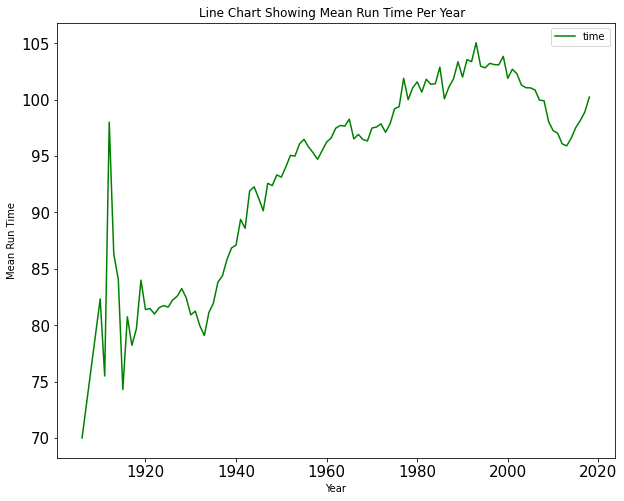

In [ ]:
df_q5 = pd.read_sql("SELECT * FROM dramas", con=conn)

### BEGIN SOLUTION 
df_q5_count = df_q5.groupby(["year"]).mean().reset_index()
df_q5_count.plot( kind = 'line', x="year", y="time",
                      rot=0, figsize = (10,8),
       title = "Line Chart Showing Mean Run Time Per Year  ",
       xlabel = "Year",
       ylabel = "Mean Run Time", fontsize= 15, color = "green");

### END SOLUTION

### 6 

Calculate the same information average running time of the dramas by year using a query.  Your query should return year and average time.  
Your solution should be of the form: 
```
pretty_print_sql(<query>) 
#or 
print_sql(<query>)
```

In [ ]:
### BEGIN SOLUTION 
### BEGIN SOLUTION 
df_q6 = pretty_print_sql('SELECT year, AVG(time) AS avgTime FROM dramas \
                        GROUP BY year ORDER BY avgTime')
### END SOLUTION 
### END SOLUTION

> SELECT year, AVG(time) AS avgTime FROM dramas                         GROUP BY year ORDER BY avgTime


,year,avgTime
0,1906,70.000000
1,1915,74.300000
2,1911,75.500000
3,1917,78.219512
4,1933,79.092715
...,...,...
105,1989,103.355252
106,1992,103.362679
107,1991,103.551451
108,1999,103.836842


## Examine `names` table

Let's switch gears to consider the `names` table. 

In [ ]:
pd.read_sql('SELECT DISTINCT * FROM names LIMIT 10;', conn)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0071877,tt0117057,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0059956,tt0054452,tt0057345,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0072562,tt0080455,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0060827,tt0050986,tt0050976"
5,nm0000006,Ingrid Bergman,1915,1982,"actress,soundtrack,producer","tt0038787,tt0036855,tt0034583,tt0038109"
6,nm0000007,Humphrey Bogart,1899,1957,"actor,soundtrack,producer","tt0034583,tt0040897,tt0043265,tt0037382"
7,nm0000008,Marlon Brando,1924,2004,"actor,soundtrack,director","tt0078788,tt0068646,tt0047296,tt0070849"
8,nm0000009,Richard Burton,1925,1984,"actor,soundtrack,producer","tt0057877,tt0059749,tt0061184,tt0087803"
9,nm0000010,James Cagney,1899,1986,"actor,soundtrack,director","tt0035575,tt0042041,tt0031867,tt0029870"


We can create a dataFrame of selected information and people.  Only consider actors and actresses, born after 1950, list only their first known movie id. 

In [ ]:
name = 'primaryName'
known = 'knownForTitles'
profession = 'primaryProfession'
born = 'birthYear'

select_actors = f'''
    SELECT DISTINCT {name} AS name, 
           CAST({born} AS int) AS born,
           SUBSTR({known}, 0, INSTR({known}, ',')) AS movie_id,
           CASE WHEN {profession} LIKE '%actor%' THEN 'actor' 
                WHEN {profession} LIKE '%actress%' THEN 'actress'   
                END AS profession
    FROM names
    WHERE {profession} LIKE '%act%' AND
          born > 1950
    '''
pd.read_sql(f'{select_actors} LIMIT 10', conn)

,name,born,movie_id,profession
0,Margaux Hemingway,1954,tt0102122,actress
1,Li Gong,1965,tt0397535,actress
2,Elena Koreneva,1953,tt7529350,actress
3,Brad Pitt,1963,tt0114746,actor
4,Gillian Anderson,1968,tt2294189,actress
5,Pamela Anderson,1967,tt0426592,actress
6,Jennifer Aniston,1969,tt0108778,actress
7,Patricia Arquette,1968,tt1065073,actress
8,Rowan Atkinson,1955,tt0110357,actor
9,Dan Aykroyd,1952,tt0080455,actor


### 7

Create a new table `dramatics` that joins the `select_actors` (from query above) with the `dramas` table by `movie_id` and returns the actor's `name`, `profession`, year `born` as well as their movie they are known for `title` and `year` it was released. 

Return 10 sorted by ascending year born.

Consider the `select_actors` query as a subquery.  Take a look at the information here on subqueries and the examples: https://www.sqlitetutorial.net/sqlite-subquery/
or https://www.w3resource.com/sqlite/sqlite-subqueries.php 

In [ ]:
### BEGIN SOLUTION 
dramatic_7 = f"""SELECT name, profession, born, title, year \
             FROM ({select_actors}) actors JOIN dramas ON
             actors.movie_id = dramas.id;
             """
# Creating a table dramatics from actors and dramas
conn.executescript(f'''
    DROP TABLE IF EXISTS dramatics;
    CREATE TABLE dramatics AS {dramatic_7};
''');
print_sql('SELECT * FROM dramatics ORDER BY year  LIMIT 10')
### END SOLUTION 

> SELECT * FROM dramatics ORDER BY year  LIMIT 10
('Adam Ant', 'actor', 1954, 'Metropolis', 1927)
('Harvey M. Guzik', 'actor', 1952, 'Plymouth Adventure', 1952)
('Dominique Vincent', 'actress', 1951, 'Il prigioniero del re', 1954)
('Bridget Duff', 'actress', 1952, 'Private Hell 36', 1954)
('Susie Mathers', 'actress', 1951, 'This Is My Love', 1954)
('Ivana Hoffmann', 'actress', 1995, 'A Real Woman', 1954)
('Columba Powell', 'actor', 1951, 'Pursuit of the Graf Spee', 1956)
('Tito Romalio', 'actor', 1951, 'Priklyucheniya Artyomki', 1956)
('Keith Coyne', 'actor', 1956, 'Fear Strikes Out', 1957)
('Cordelia Monsey', 'actress', 1956, 'Woman in a Dressing Gown', 1957)



In [ ]:
### Creating the dataFrame to display the results
df_q7 = pretty_print_sql('SELECT * FROM dramatics ORDER BY year  LIMIT 10')
df_q7


> SELECT * FROM dramatics ORDER BY year  LIMIT 10


,name,profession,born,title,year
0,Adam Ant,actor,1954,Metropolis,1927
1,Harvey M. Guzik,actor,1952,Plymouth Adventure,1952
2,Dominique Vincent,actress,1951,Il prigioniero del re,1954
3,Bridget Duff,actress,1952,Private Hell 36,1954
4,Susie Mathers,actress,1951,This Is My Love,1954
5,Ivana Hoffmann,actress,1995,A Real Woman,1954
6,Columba Powell,actor,1951,Pursuit of the Graf Spee,1956
7,Tito Romalio,actor,1951,Priklyucheniya Artyomki,1956
8,Keith Coyne,actor,1956,Fear Strikes Out,1957
9,Cordelia Monsey,actress,1956,Woman in a Dressing Gown,1957


## Add new table `name_to_title`

Note, both the `titles` and `names` tables have fields that contains array of items, e.g., `names`- `knownForTitles`, `names` - `primaryProfession`, `titles` - `genres`, etc. 

We saw in Example 2A and Question 5 we can still extract rows that match a certain genre, e.g., "%Drama%".  Or, in Example 2B, we can select the first title that an person is known for.  

However, classic relational database design should not contain lists of items in a field.  Therefore, we will expand out these fields to new tables. 

First, we will add a new table `name_to_title` that matches each name id `nconst` with the title id `tconst`.





In [ ]:
cursor = conn.cursor()
cursor.execute("""Select * from names""")
all_data = cursor.fetchall()
cursor.execute("""CREATE TABLE IF NOT EXISTS name_to_title
                    (nconst TEXT,
                    tconst TEXT)""")


In [ ]:
for single_data in all_data:
    person  = single_data[5].split(",")
    for single_data2 in person:
        cursor.execute("INSERT INTO name_to_title VALUES(:nconst,:tconst)",
                       { "nconst": single_data[0], "tconst": single_data2 })
conn.commit()

In [ ]:
print_sql('SELECT * FROM name_to_title LIMIT 10;')

> SELECT * FROM name_to_title LIMIT 10;
('nm0000001', 'tt0053137')
('nm0000001', 'tt0031983')
('nm0000001', 'tt0050419')
('nm0000001', 'tt0072308')
('nm0000002', 'tt0038355')
('nm0000002', 'tt0071877')
('nm0000002', 'tt0117057')
('nm0000002', 'tt0037382')
('nm0000003', 'tt0059956')
('nm0000003', 'tt0054452')



We can also separate out the list of professions to a separate table `name_to_profession`. 

In [ ]:
cursor = conn.cursor()
cursor.execute("""Select * from names""")
all_data = cursor.fetchall()
cursor.execute("""CREATE TABLE IF NOT EXISTS name_to_profession
                    (nconst TEXT,
                    profession TEXT)""")

In [ ]:
for single_data in all_data:
    person  = single_data[4].split(",")
    for single_data2 in person:
        cursor.execute("INSERT INTO name_to_profession VALUES(:nconst,:prof)",
                       { "nconst": single_data[0], "prof": single_data2 })
conn.commit()

In [ ]:
print_sql('SELECT * FROM name_to_profession LIMIT 10;')

> SELECT * FROM name_to_profession LIMIT 10;
('nm0000001', 'soundtrack')
('nm0000001', 'actor')
('nm0000001', 'miscellaneous')
('nm0000002', 'actress')
('nm0000002', 'soundtrack')
('nm0000003', 'actress')
('nm0000003', 'soundtrack')
('nm0000003', 'music_department')
('nm0000004', 'actor')
('nm0000004', 'soundtrack')



In [ ]:
# Clean up variables (reduce memory usage)
del all_data

## Age of Actors in Films 

We are now interested in looking at the age of actors (both actors and actresses) in movies. 

We can start to look at this by first examining the actors and actresses. 



In [ ]:
pretty_print_sql("""
SELECT n.nconst, 
    n.primaryName AS name, 
    n.birthYear AS born,
    ntp.profession
FROM names n, name_to_profession ntp
WHERE 
    n.nconst = ntp.nconst AND
    (ntp.profession = 'actor' OR ntp.profession = 'actress') 
LIMIT 10;
""")

> 
SELECT n.nconst, 
    n.primaryName AS name, 
    n.birthYear AS born,
    ntp.profession
FROM names n, name_to_profession ntp
WHERE 
    n.nconst = ntp.nconst AND
    (ntp.profession = 'actor' OR ntp.profession = 'actress') 
LIMIT 10;



,nconst,name,born,profession
0,nm0000001,Fred Astaire,1899,actor
1,nm0000002,Lauren Bacall,1924,actress
2,nm0000003,Brigitte Bardot,1934,actress
3,nm0000004,John Belushi,1949,actor
4,nm0000005,Ingmar Bergman,1918,actor
5,nm0000006,Ingrid Bergman,1915,actress
6,nm0000007,Humphrey Bogart,1899,actor
7,nm0000008,Marlon Brando,1924,actor
8,nm0000009,Richard Burton,1925,actor
9,nm0000010,James Cagney,1899,actor


Next we want to examine the age of actors in different movies.  This means we need to combine the `actor` information with the date of the films.  

We can use a [Common Table Expression](https://www.essentialsql.com/introduction-common-table-expressions-ctes/). 

In [ ]:
pretty_print_sql("""
WITH actors AS (
    SELECT n.nconst, 
        n.primaryName AS name, 
        n.birthYear AS born,
        ntp.profession
    FROM names n, name_to_profession ntp
    WHERE 
        n.nconst = ntp.nconst AND
        (ntp.profession = 'actor' OR ntp.profession = 'actress') 
    )
SELECT 
    a.nconst,
    a.name,
    t.startYear - a.born AS age,
    t.startYear,
    t.primaryTitle,
    a.profession
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst 
LIMIT 10;
""")

> 
WITH actors AS (
    SELECT n.nconst, 
        n.primaryName AS name, 
        n.birthYear AS born,
        ntp.profession
    FROM names n, name_to_profession ntp
    WHERE 
        n.nconst = ntp.nconst AND
        (ntp.profession = 'actor' OR ntp.profession = 'actress') 
    )
SELECT 
    a.nconst,
    a.name,
    t.startYear - a.born AS age,
    t.startYear,
    t.primaryTitle,
    a.profession
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst 
LIMIT 10;



,nconst,name,age,startYear,primaryTitle,profession
0,nm0000001,Fred Astaire,40,1939,The Story of Vernon and Irene Castle,actor
1,nm0000001,Fred Astaire,58,1957,Funny Face,actor
2,nm0000001,Fred Astaire,60,1959,On the Beach,actor
3,nm0000001,Fred Astaire,75,1974,The Towering Inferno,actor
4,nm0000002,Lauren Bacall,20,1944,To Have and Have Not,actress
5,nm0000002,Lauren Bacall,22,1946,The Big Sleep,actress
6,nm0000002,Lauren Bacall,50,1974,Murder on the Orient Express,actress
7,nm0000002,Lauren Bacall,72,1996,The Mirror Has Two Faces,actress
8,nm0000003,Brigitte Bardot,22,1956,...And God Created Woman,actress
9,nm0000003,Brigitte Bardot,26,1960,La Vérité,actress


We can use "format strings" to plug into the queries. 

In [ ]:
actors_query = """
SELECT n.nconst, 
    n.primaryName AS name, 
    n.birthYear AS born,
    ntp.profession
FROM names n, name_to_profession ntp
WHERE 
    n.nconst = ntp.nconst AND
    (ntp.profession = 'actor' OR ntp.profession = 'actress') 
"""

In [ ]:
pretty_print_sql(f"""
WITH actors AS ({actors_query})
SELECT 
    a.nconst,
    a.name,
    t.startYear - a.born AS age,
    t.startYear,
    t.primaryTitle,
    a.profession
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst 
LIMIT 10;
""")

> 
WITH actors AS (
SELECT n.nconst, 
    n.primaryName AS name, 
    n.birthYear AS born,
    ntp.profession
FROM names n, name_to_profession ntp
WHERE 
    n.nconst = ntp.nconst AND
    (ntp.profession = 'actor' OR ntp.profession = 'actress') 
)
SELECT 
    a.nconst,
    a.name,
    t.startYear - a.born AS age,
    t.startYear,
    t.primaryTitle,
    a.profession
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst 
LIMIT 10;



,nconst,name,age,startYear,primaryTitle,profession
0,nm0000001,Fred Astaire,40,1939,The Story of Vernon and Irene Castle,actor
1,nm0000001,Fred Astaire,58,1957,Funny Face,actor
2,nm0000001,Fred Astaire,60,1959,On the Beach,actor
3,nm0000001,Fred Astaire,75,1974,The Towering Inferno,actor
4,nm0000002,Lauren Bacall,20,1944,To Have and Have Not,actress
5,nm0000002,Lauren Bacall,22,1946,The Big Sleep,actress
6,nm0000002,Lauren Bacall,50,1974,Murder on the Orient Express,actress
7,nm0000002,Lauren Bacall,72,1996,The Mirror Has Two Faces,actress
8,nm0000003,Brigitte Bardot,22,1956,...And God Created Woman,actress
9,nm0000003,Brigitte Bardot,26,1960,La Vérité,actress


###  8 

Let's calculate the average age of an actor (actors and actresses) in a movie (the `startYear` for a movie - when an actor was born `birthYear`), for all actors born after 1950. 



In [ ]:
### BEGIN SOLUTION 
pretty_print_sql("""
WITH actors AS (
    SELECT n.nconst, 
        n.primaryName AS name, 
        n.birthYear > 1950 AS born,
        ntp.profession
    FROM names n, name_to_profession ntp
    WHERE 
        n.nconst = ntp.nconst AND
        (ntp.profession = 'actor' OR ntp.profession = 'actress') 
    )
SELECT 
    a.nconst,
    a.name,
    AVG(t.startYear - a.born) AS avgAge,
    t.startYear,
    t.primaryTitle,
    a.profession
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst 
GROUP BY
    primaryTitle;
""")

### END SOLUTION 

> 
WITH actors AS (
    SELECT n.nconst, 
        n.primaryName AS name, 
        n.birthYear > 1950 AS born,
        ntp.profession
    FROM names n, name_to_profession ntp
    WHERE 
        n.nconst = ntp.nconst AND
        (ntp.profession = 'actor' OR ntp.profession = 'actress') 
    )
SELECT 
    a.nconst,
    a.name,
    AVG(t.startYear - a.born) AS avgAge,
    t.startYear,
    t.primaryTitle,
    a.profession
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst 
GROUP BY
    primaryTitle;



,nconst,name,avgAge,startYear,primaryTitle,profession
0,nm6529522,Jaime Szczesny,2012.142857,2014,#,actress
1,nm10701202,Leila Hazuki,2018.000000,2019,# En [Interchange],actress
2,nm4671911,Brandon McGuire,1928.240000,2010,#1,actor
3,nm6358837,Paul Tran,2013.000000,2014,#1 Beauty Nail Salon,actor
4,nm5424960,Saman Nasir,2009.000000,2010,#1 Cheerleader Camp,actor
...,...,...,...,...,...,...
896116,nm5502396,Julia Gögh,2011.000000,2012,üç,actor
896117,nm7066510,Aleksander Bulatovic,2014.000000,2015,Šiška Deluxe,actor
896118,nm9609498,Anna Den,2015.000000,2016,ГорбургерШоу,actress
896119,nm7651335,Neriyus Mankus,2019.000000,2020,Сriminal code article105,actor


Note, you may get a value that doesn't really make sense.  We will try to fix this in the Bonus Question. 

### 9

Let's dive into the results. Because these queries can take a while, let's pull this information from Question 8 into a DataFrame, but returning information like `name`, `age`, `title.startYear`, `t.primaryTitle`.  

Use `df = pd.read_sql("query", conn)`

In [ ]:
### BEGIN SOLUTION
df = pd.read_sql("""
SELECT name, age, startYear, primaryTitle
FROM
(
 WITH actors AS (
    SELECT n.nconst, 
        n.primaryName AS name, 
        n.birthYear  AS born,
        ntp.profession
    FROM names n, name_to_profession ntp
    WHERE 
        n.nconst = ntp.nconst AND
        (ntp.profession = 'actor' OR ntp.profession = 'actress') 
    )
SELECT 
    a.nconst,
    a.name,
    t.startYear - a.born AS age,
    t.startYear,
    t.primaryTitle,
    a.profession
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst AND born > 1950
)
""", conn)
### END SOLUTION 

In [ ]:
df.head(5)

,name,age,startYear,primaryTitle
0,Margaux Hemingway,22,1976,Lipstick
1,Margaux Hemingway,25,1979,Killer Fish
2,Margaux Hemingway,37,1991,Inner Sanctum
3,Margaux Hemingway,40,1994,Inner Sanctum II
4,Li Gong,26,1991,Raise the Red Lantern


In [ ]:
df.age.mean()

1767.0893300093817

In [ ]:
df.sort_values("age").head()

,name,age,startYear,primaryTitle
1201851,Romy Jean Nyman,-2017,\N,Paradise City
1201852,Piper Nyman,-2017,\N,Paradise City
1606247,Ti Woody Clements,-2016,\N,Baby Blister
6369915,Titus Milo Leon,-2014,\N,Space Opera - The Shade of Human Soul
6369916,Titus Milo Leon,-2014,\N,Down Earth


Try to solve issues the "\N" missing values. Removes ages < 0, remove movies that were started before 1940 or were started after 2020, remove actors with no birthdate. 

In [ ]:
### BEGIN SOLUTION
df2 = pd.read_sql("""
SELECT name, age, startYear, primaryTitle
FROM
(
 WITH actors AS (
    SELECT n.nconst, 
        n.primaryName AS name, 
        n.birthYear  AS born,
        ntp.profession
    FROM names n, name_to_profession ntp
    WHERE 
        n.nconst = ntp.nconst AND
        (ntp.profession = 'actor' OR ntp.profession = 'actress') 
    )
SELECT 
    a.nconst,
    a.name,
    t.startYear - a.born AS age,
    t.startYear,
    t.primaryTitle,
    a.profession
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst AND born > 1950 AND age > 0 
    AND startYear < 2020 AND startYear > 1940 AND startYear != '\\N'
)
""", conn)
### END SOLUTION

In [ ]:
# Filtering dataframe with logical age correlation
# Removing any other missing,null values to remove absurd age readings
df2 = df2[df2['age'] > 15 ]
df2 = df2[df2['age'] < 110 ]

In [ ]:
df2.age.mean()

35.61554232628959

In [ ]:
df2.sort_values("age", ascending=True)

,name,age,startYear,primaryTitle
546866,Jess Hill,25,1994,Troublemakers
622321,Melissa Peterman,25,1996,Fargo
3069780,Bálint Antal,25,2010,Karádysokk
1785394,Mills Pierre,25,2004,The Raven
678341,Rupinder Brar,25,2000,X-Men
...,...,...,...,...
3464524,Rick Macy,59,2012,The Last Man(s) on Earth
4015218,Houston Nutt,59,2016,Greater
4566147,Christopher Baskerville,59,2017,Boar
5944338,Ulrike Bliefert,59,2010,Der Bulle und das Landei


In [ ]:
df2.sort_values("age", ascending=False)

,name,age,startYear,primaryTitle
4948263,Henk Poort,59,2015,Vechtershart
3457316,E.J. Nolan,59,2012,Revolution
3464524,Rick Macy,59,2012,The Last Man(s) on Earth
5391030,Nestor Torres,59,2016,Rosario Tijeras
5392204,Linda Cohn,59,2018,Creed II
...,...,...,...,...
3121019,Christine J Hazard,25,2010,I Owe My Life to Corbin Bleu
3120917,Diane Guerrero,25,2011,Festival
497785,James Marshall,25,1992,Twin Peaks: Fire Walk with Me
2065092,Kaylee DeFer,25,2011,Red State


Then, create a DataFrame that has for each year of films, the profession ('actor' and 'actress'), the average age of profession, and the number ("count") of the profession. 


In [ ]:
df3 = pd.read_sql("""
SELECT name, AVG(age), startYear, profession, COUNT(profession)
FROM
(
 WITH actors AS (
    SELECT n.nconst, 
        n.primaryName AS name, 
        n.birthYear  AS born,
        ntp.profession
    FROM names n, name_to_profession ntp
    WHERE 
        n.nconst = ntp.nconst AND
        (ntp.profession = 'actor' OR ntp.profession = 'actress') 
    )
SELECT 
    a.nconst,
    a.name,
    t.startYear - a.born AS age,
    t.startYear,
    t.primaryTitle,
    a.profession
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst AND born > 1950 AND age > 0 AND startYear < 2020 AND startYear > 1940 AND startYear != '\\N' AND born != '\\N'
)
GROUP BY startYear
""", conn)
### END SOLUTION

In [ ]:
df3.tail()

,AVG(age),startYear,profession,COUNT(profession)
63,35.019823,2015,actress,24618
64,35.176893,2016,actor,25049
65,35.607374,2017,actor,23814
66,36.212733,2018,actress,20890
67,36.975103,2019,actress,17633
